In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import torch as t
from paren_checker import HighLevelParensBalanceChecker, BalancedParensDataset, SequentialParensDataset
from paren_checker import test_HL_parens_components
test_HL_parens_components()
balance_checker = HighLevelParensBalanceChecker()
dset = BalancedParensDataset(
        N_samples = 5,
        n_ctx = 42, #accounts for a BOS and a PAD
        seed = 42
    )
print('the markers', dset.get_dataset()['markers'])
for item in dset.get_dataset():
    output = balance_checker(t.Tensor(item['tokens'])[None,:])
    print(output[0,-1], item['labels'])
    print(''.join(item['str_tokens']))
    

All tests passed!
the markers [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]
tensor(0.) 0
BOS ( ) ( ( ) ) ) ) ( ) ) ( ) ) ) ) ) ( ( ) ) ) ) ) ) ) ) ) ) ) ( ( ( ) ( ( ) ( ) ( ( PAD
tensor(0.) 0
BOS ( ) ( ) ( ( ) ) ) ) ) ( ( ( ( ) ( ) ) ) ) ) ( ( ) ( ( ) ( ) ) ) ( ( ) ( ) ) ) ( ( PAD
tensor(0.) 0
BOS ( ) ) ) ( ) ( ( ( ( ) ( ) ) ( ( ) ( ( ( ( ) ) ) ) ) ( ) ) ) ) ( ( ( ( ) ) ( ) ( ( PAD
tensor(1.) 1
BOS ( ) ( ) ( ) ( ) PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD
tensor(1.) 1
BOS ( ) ( ) ( ) PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD
tensor(1.) 1
BOS ( ) ( ( ) ) PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD
tensor(0.) 0
BOS ( ( ( ) ) ) ( ( ) ) ( ) ) ( PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD 

In [5]:
from paren_checker import get_LL_parens_model_and_correspondence
ll_model, corr, unused_nodes = get_LL_parens_model_and_correspondence()
print("Model:")
print(ll_model)
print("\nCorrespondence:")
for k, i in corr.items():
    print(k, i)
print("\nUnused:")
for n in unused_nodes:
    print(n)

Model:
HookedTransformer(
  (embed): Embed()
  (hook_embed): HookPoint()
  (pos_embed): PosEmbed()
  (hook_pos_embed): HookPoint()
  (blocks): ModuleList(
    (0-1): 2 x TransformerBlock(
      (ln1): LayerNorm(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2): LayerNorm(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (attn): Attention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_pattern): HookPoint()
        (hook_result): HookPoint()
      )
      (mlp): MLP(
        (hook_pre): HookPoint()
        (hook_post): HookPoint()
      )
      (hook_attn_in): HookPoint()
      (hook_q_input): HookPoint()
      (hook_k_input): HookPoint()
      (hook_v_input): HookPoint()
      (hook_mlp_in): HookPoint()
      (hook_attn_out): HookPoint()
      (hook_mlp_out): HookPoint()
      (ho

In [14]:

dset = BalancedParensDataset(
        N_samples = 20_000,
        n_ctx = 42, #accounts for a BOS and a PAD
        seed = 42
    )
dataset = dset.get_dataset()
print(dataset.shape)

(23264, 4)


In [20]:
import torch as t
from siit_utils import ModelTrainerSIIT
from paren_checker import paren_checker_loss_fn as loss_fn

ll_model, corr, unused_nodes = get_LL_parens_model_and_correspondence(n_ctx = 42)

trainer = ModelTrainerSIIT(
    ll_model=ll_model,
    hl_model=balance_checker,
    dataset=dataset,
    corr=corr,
    unused_nodes=unused_nodes,
    loss_fn=loss_fn,
    baseline_weight = 1,
    iit_weight = 1,
    siit_weight = 1,
    batch_size = 256,
    device = 'cuda'
)

results = trainer.train(epochs=50)

Moving model to device:  cuda
Epoch 1/50


Epoch 2/50


Epoch 3/50


Epoch 4/50


Epoch 5/50


Epoch 6/50


Epoch 7/50


Epoch 8/50


Epoch 9/50


Epoch 10/50


Epoch 11/50


Epoch 12/50


Epoch 13/50


Epoch 14/50


Epoch 15/50


Epoch 16/50


Epoch 17/50


Epoch 18/50


Epoch 19/50


Epoch 20/50


Epoch 21/50


Epoch 22/50


Epoch 23/50


Epoch 24/50


Epoch 25/50


Epoch 26/50


Epoch 27/50


Epoch 28/50


Epoch 29/50


Epoch 30/50


Epoch 31/50


Epoch 32/50


Epoch 33/50


Epoch 34/50


Epoch 35/50


Epoch 36/50


Epoch 37/50


Epoch 38/50


Epoch 39/50


Epoch 40/50


Epoch 41/50


Epoch 42/50


Epoch 43/50


Epoch 44/50


Epoch 45/50


Epoch 46/50


Epoch 47/50


Epoch 48/50


Epoch 49/50


Epoch 50/50


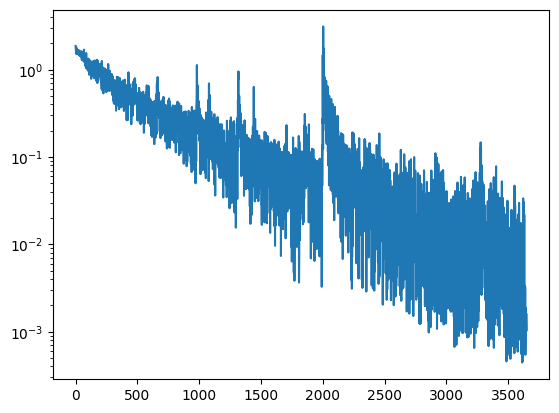

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.semilogy(results['train_loss'])

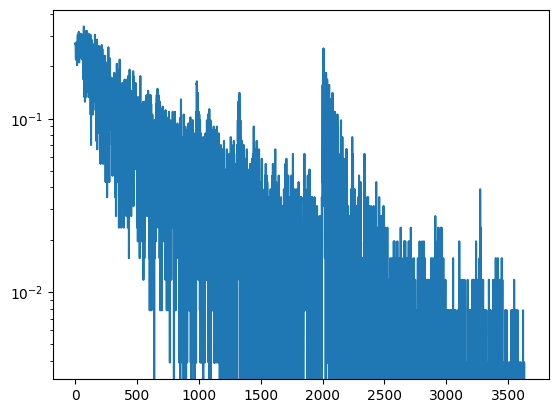

In [22]:
import numpy as np
plt.semilogy(1 - np.array(results['train_IIA']))

In [23]:
results['test_IIA']

[0.8341100153170133,
 0.881807383738066,
 0.9301991964641371,
 0.9042945912009791,
 0.9165661554587515,
 0.9480994155532435,
 0.9760736478002447,
 0.9522889256477356,
 0.9223227344061199,
 0.9853252925370869,
 0.9904011331106487,
 0.9932794225843329,
 0.990953947368421,
 0.9954769736842105,
 0.9950657894736842,
 0.994860197368421,
 0.994860197368421,
 0.9692251462685434,
 0.9979440789473685,
 0.9919819078947368,
 0.9979440789473685,
 0.9983552631578947,
 0.9979440789473685,
 0.9981496710526315,
 0.9977384868421053,
 0.9971217105263158,
 0.998766447368421,
 0.9954769736842105,
 0.9981496710526315,
 0.9983552631578947,
 0.997327302631579,
 0.9995888157894737,
 0.9985608552631579,
 0.9983552631578947,
 0.9985608552631579,
 0.9991776315789473,
 0.9989720394736842,
 0.9993832236842105,
 0.9993832236842105,
 0.9989720394736842,
 0.9993832236842105,
 0.9993832236842105,
 0.9997944078947368,
 0.9993832236842105,
 0.9995888157894737,
 0.9997944078947368,
 0.9993832236842105,
 0.9993832236842105

In [24]:
from functools import partial
from siit_utils import make_post_ablation_hook
tot = 0
errors = 0
ablated_errors = 0
for b in trainer.test_dataloaders[0]:
    tokens, labels = b
    logits, cache = ll_model.run_with_cache(tokens)
    output_labels = t.round(t.sigmoid(logits)[:,-1,-1])
    sumdiff = (labels.cuda() != output_labels.float()).sum().item()

    hooks = []
    for node in unused_nodes:
        hooks.append((node.name, make_post_ablation_hook(ll_node=node, ll_cache=cache, method='mean')))
    ablated_logits = ll_model.run_with_hooks(tokens, fwd_hooks=hooks)
    
    ablated_labels = t.round(t.sigmoid(ablated_logits)[:,-1,-1])
    ablated_sumdiff = (labels.cuda() != ablated_labels.float()).sum().item()

    errors += sumdiff
    ablated_errors += ablated_sumdiff
    tot += labels.numel()
print(f'Errors: {errors}/{tot}, Ablated Err: {ablated_errors}/{tot}')
    

Errors: 6/4653, Ablated Err: 15/4653


In [7]:
#TODO: Add lines to save model to huggingface.

# SAE

In [28]:
from paren_checker import create_paren_checker_tokenizer
tokenizer = create_paren_checker_tokenizer()
ll_model.tokenizer = tokenizer #attach to model.

Encoded: [3, 0, 1, 0, 1, 2, 2, 2]
Decoded: BOS ( ) ( ) PAD PAD PAD


In [29]:
from sae_utils import make_sae_lens_config
sae_lens_cfg = make_sae_lens_config(
    model=ll_model, 
    # hook_name="blocks.0.mlp.hook_post", 
    hook_name="blocks.0.attn.hook_z", 
    hook_layer=0, 
    l1_coeff=0.1,
    hook_head_index=0, 
    context_size=ll_model.cfg.n_ctx,
    # d_in=ll_model.cfg.d_mlp,
    d_in=ll_model.cfg.d_head,
    device = 'cuda',
    checkpoint_path = f"$HOME/persistent-storage/tracr_saes/parens_sae_checkpoints",
    wandb_project =  "benchmark_saes",
    training_tokens = 100_000_000
)

hook_head_index 0
context_size 42
d_in 8
wandb_project benchmark_saes
Run name: 32-L1-0.1-LR-0.0003-Tokens-1.000e+08
n_tokens_per_buffer (millions): 0.00336
Lower bound: n_contexts_per_buffer (millions): 8e-05
Total training steps: 1250000
Total wandb updates: 125000
n_tokens_per_feature_sampling_window (millions): 6.72
n_tokens_per_dead_feature_window (millions): 3.36
We will reset the sparsity calculation 625 times.
Number tokens in sparsity calculation window: 1.60e+05
Using Ghost Grads.


In [ ]:
from sae_utils import train_sae

#I need to be able to tell the SAE to ignore certain tokens during training.
sae, store = train_sae(ll_model, sae_lens_cfg, dataset, batch_size=256, ignore_tokens=[0, 3])

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /home/dev/.netrc


Training SAE:   0%|                                                                         | 0/100000000 [00:00<?, ?it/s]/workspace/quick-experiments/sae_utils.py:316: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t.tensor(dataset['tokens']).int(),
3000| MSE Loss 0.015 | L1 0.062:  20%|██████▉                            | 19726275/100000000 [00:37<02:39, 504407.56it/s]

saving $HOME/persistent-storage/tracr_saes/parens_sae_checkpoints/8ib4hsa6/20001689


6000| MSE Loss 0.012 | L1 0.059:  39%|█████████████▊                     | 39451133/100000000 [01:13<01:50, 547122.45it/s]

saving $HOME/persistent-storage/tracr_saes/parens_sae_checkpoints/8ib4hsa6/40003653


8100| MSE Loss 0.011 | L1 0.061:  53%|██████████████████▋                | 53258374/100000000 [01:39<01:24, 552937.44it/s]

In [39]:
from sae_utils import make_token_df
from torch.utils.data import DataLoader, TensorDataset

n_activations_sum = t.zeros(sae.cfg.d_sae).to(sae.device)
input_tokens_list = []
learned_activations = []

small_dataset = ParensBalanceDataset(N_samples=10_000, n_ctx=20).get_dataset()
small_dataset = TensorDataset(
    t.tensor(small_dataset['tokens']).int(), 
    t.tensor(small_dataset['labels']).float()
)
dataloader  = DataLoader(small_dataset, batch_size=256, shuffle = False)

# small_trainer = ModelTrainerSIIT(
#     ll_model=ll_model,
#     hl_model=balance_checker,
#     dataset=small_dataset,
#     corr=corr,
#     unused_nodes=unused_nodes,
#     loss_fn=loss_fn,
#     baseline_weight = 1,
#     iit_weight = 1,
#     siit_weight = 1,
#     batch_size = 256,
#     device = 'cuda'
# )

#go through the training dataset and get max activations for each feature
total_inputs = 0
for batch in dataloader:
    tokens, labels = batch
    total_inputs += tokens.numel()
    logits, cache = ll_model.run_with_cache(tokens)
    sae_in = cache[sae.cfg.hook_name]
    if sae.cfg.hook_head_index is not None:
        sae_in = sae_in[:,:,sae.cfg.hook_head_index,:] #I think this is how attn head indexing works...
    activations = sae.encode(sae_in)
    # print(activations.shape, labels.shape, tokens.shape, tokens.numel())
    activations[t.isin(tokens.int(), t.Tensor([0, 3]).int())] = 0

    # For sparsity calculation
    n_new_activations = (activations > 0).sum(dim=(0,1)) #sum over batch and ctx
    n_activations_sum = n_activations_sum + n_new_activations

    # Save tokens and activations
    input_tokens_list.append(tokens.cpu())
    learned_activations.append(activations.to(t.float16).cpu().reshape(-1, sae.cfg.d_sae))

    if total_inputs > 1_000_000:
        break
sparsity = n_activations_sum / total_inputs
tokens = t.cat(input_tokens_list).to(int)
token_df = make_token_df(ll_model, tokens, len_prefix=ll_model.cfg.n_ctx)
learned_activations = t.cat(learned_activations).to(t.float16)
token_df.shape

tokens torch.Size([10000, 20])


(200000, 8)

In [40]:
print(type(token_df['prefix'][10]))
print(type(token_df['str_tokens'][10]))

<class 'str'>
<class 'str'>


In [41]:
from transformer_lens import utils
import ipywidgets as widgets
from IPython.display import display

def update_dataframe(feature_id):
    token_df["activation"] = utils.to_numpy(learned_activations[:,feature_id])
    df = token_df[['str_tokens','prefix', 'suffix',  'context', 'activation']]
    df = df.sort_values("activation", ascending=False).head(100)
    unique = df[['str_tokens', 'prefix', 'activation']].drop_duplicates()
    display(unique[unique['activation'] > 0].head(100).style.background_gradient("coolwarm"))

# Define the dropdown menu for 'feat'
feat_dropdown = widgets.Dropdown(
    options=range(sae.cfg.d_sae),
    value=0,
    description='Feature:',
)

# Create an interactive output widget
output = widgets.interactive_output(
    update_dataframe, 
    {
        'feature_id': feat_dropdown,
    }
)

# Display the dropdown menu and output
display(feat_dropdown, output)



Dropdown(description='Feature:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19…

Output()

sae for attn 0:

0. Weak version of 3
1. ) after BOS, ele = -1
2. ( after BOS, ele = 2
3. ) after BOS)))), ele = -5
4. PAD
5. PAD
6. BOS
7. ) on a long sequence like BOS))))))))))) (very negative elevation
8. dead?
9. Weak ) after BOS))))), ele=-6
10. ) after BOS, ele = -1
11. ( after BOS((((, ele=5
12. same as 11
13. same as 3
14. ( after something like BOS))))))))))
15. same as 3
16. Weak ) after BOS)), ele=-3
17. Same as 3
18. Same as 7
19. weak last-token-position feature
20. ( after BOS (same as 2)
21. Same as 7
22. Same as 11
23. Dead
24. Same as 1
25. PAD
26. PAD
27. weak polysemantic feature?
28. ( after BOS(((((( (very positive elevation)
29. PAD
30. same as 3
31. same as 3

OK but none of these has any () () types of features which would be important for elevation...

In [70]:
print(sparsity)

tensor([8.1204e-03, 1.7862e-02, 1.0876e-01, 1.1166e-01, 1.6261e-01, 1.2456e-04,
        2.0000e-01, 4.0609e-01, 0.0000e+00, 8.7565e-02, 2.8484e-02, 3.2870e-01,
        1.0235e-01, 7.1886e-02, 1.1990e-02, 5.4087e-01, 1.6762e-02, 2.7499e-02,
        1.0810e-01, 4.0856e-05, 1.5344e-01, 5.2172e-01, 2.8940e-01, 0.0000e+00,
        4.0261e-02, 3.9381e-03, 7.3113e-03, 4.5251e-03, 2.3200e-01, 4.3447e-04,
        3.5353e-02, 2.6965e-02], device='cuda:0')


torch.Size([1003520, 32])
